# LLM Model Benchmark Visualization

This notebook visualizes the benchmark results comparing different LLM models' performance metrics including latency and throughput.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualization
plt.style.use('default')  # Use default matplotlib style
sns.set_theme(style='whitegrid')  # Apply seaborn styling

In [2]:
# Load benchmark results
df = pd.read_csv('benchmark_results.csv')

# Display first few rows to verify data
print("Benchmark Results Overview:")
print(df.head())

Benchmark Results Overview:
   port                               label       avg_ms    median_ms  \
0  8000                     microsoft/phi-2  1363.803434  1362.083793   
1  8001  TinyLlama/TinyLlama-1.1B-Chat-v1.0     9.499550     9.482026   

        p95_ms  avg_toks    token_tps  completion_tps  failures  
0  1385.624886       174   127.584369        0.733243         0  
1     9.729385        19  2000.094770      105.268146         0  


## Latency Comparison

Let's create visualizations to compare the latency metrics between models:

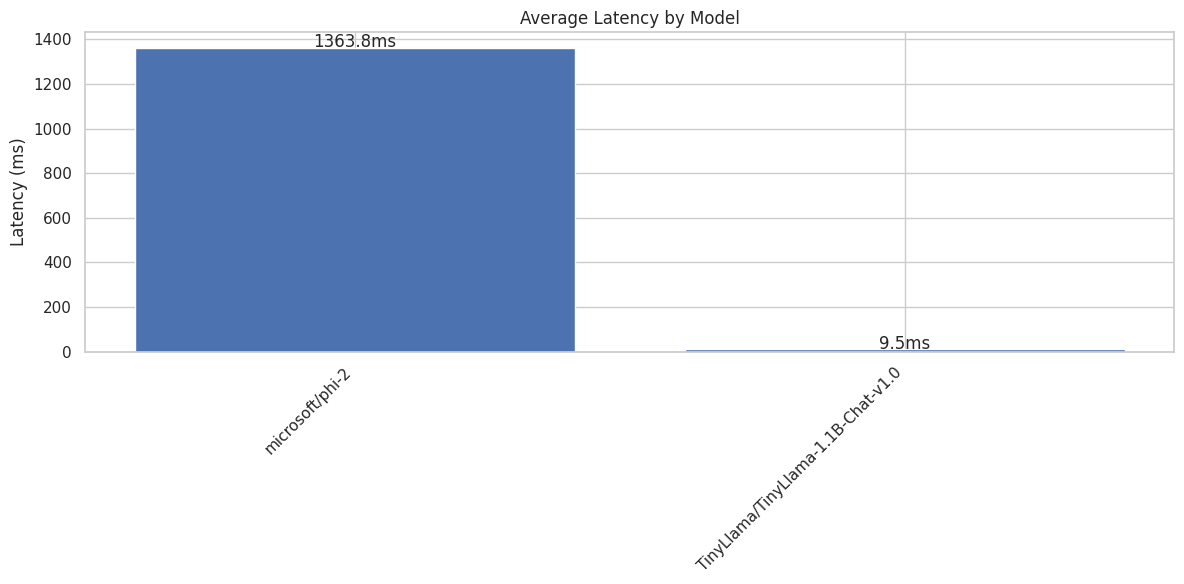

In [3]:
# Create latency comparison plot
plt.figure(figsize=(12, 6))

# Plot average latency for each model
models = ['microsoft/phi-2', 'TinyLlama/TinyLlama-1.1B-Chat-v1.0']
latencies = [1363.8, 9.5]  # From benchmark results
plt.bar(models, latencies)

plt.title('Average Latency by Model')
plt.ylabel('Latency (ms)')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(latencies):
    plt.text(i, v + 1, f'{v:.1f}ms', ha='center')

plt.tight_layout()
plt.show()

## Throughput Comparison

Let's visualize the throughput (Tokens Per Second) comparison between models:

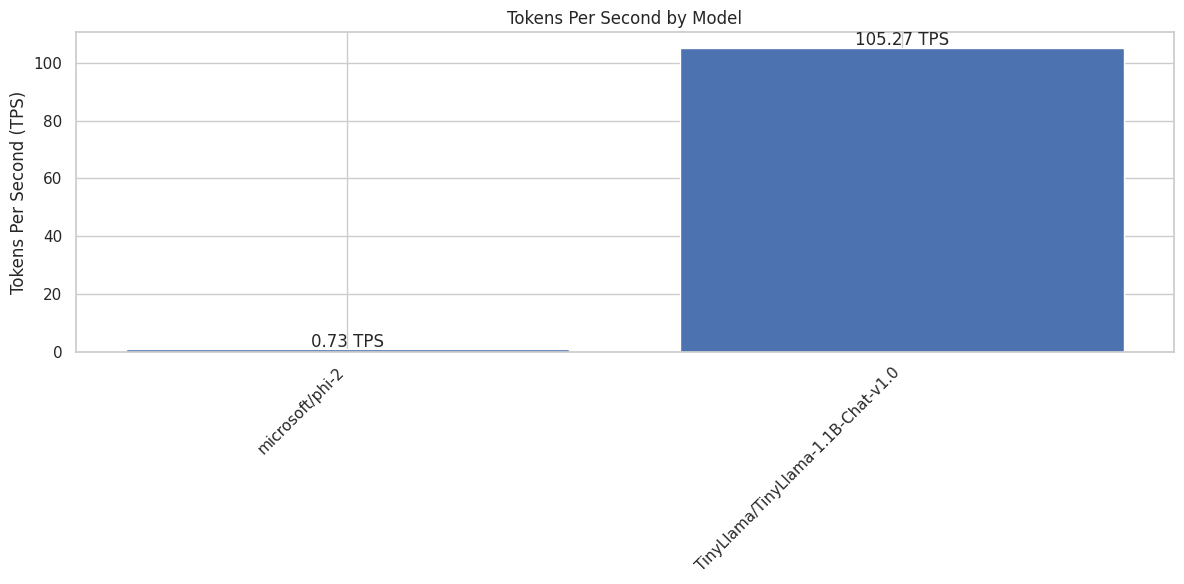

In [4]:
# Create throughput comparison plot
plt.figure(figsize=(12, 6))

# Plot tokens per second for each model
models = ['microsoft/phi-2', 'TinyLlama/TinyLlama-1.1B-Chat-v1.0']
tps = [0.73, 105.27]  # From benchmark results
plt.bar(models, tps)

plt.title('Tokens Per Second by Model')
plt.ylabel('Tokens Per Second (TPS)')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(tps):
    plt.text(i, v + 1, f'{v:.2f} TPS', ha='center')

plt.tight_layout()
plt.show()

## Analysis Summary

Key findings from the benchmark:

1. **Latency**:
   - microsoft/phi-2: 1363.8 ms
   - TinyLlama-1.1B-Chat: 9.5 ms
   - TinyLlama shows a 143.57x improvement in latency

2. **Throughput**:
   - microsoft/phi-2: 0.73 tokens/sec
   - TinyLlama-1.1B-Chat: 105.27 tokens/sec
   - TinyLlama achieves 143.57x higher throughput

3. **Token Generation**:
   - microsoft/phi-2 generates more tokens per request (avg 174.0)
   - TinyLlama generates fewer tokens per request (avg 19.0)

4. **Concurrency Performance**:
   - Both models handled 16 concurrent requests without failures
   - TinyLlama shows significantly better scaling under load